In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 使用 pandas 读取数据
filename1 = r'./model/ethylene_CO.csv'
filename2 = r'./model/ethylene_methane.csv'
# 只读取需要的列
data1 = pd.read_csv(filename1)
data2 = pd.read_csv(filename2)

print(data1.columns)
print(data2.columns)

Index(['Unnamed: 0', 'Time(sec)', 'CO con: (ppm)', 'Ethylene con: (ppm',
       'TGS2602-1', 'TGS2602-2', 'TGS2600-1', 'TGS2600-2', 'TGS2610-1',
       'TGS2610-2', 'TGS2620-1', 'TGS2620-2', 'TGS2602-3', 'TGS2602-4',
       'TGS2600-3', 'TGS2600-4', 'TGS2610-3', 'TGS2610-4', 'TGS2620-3',
       'TGS2620-4'],
      dtype='object')
Index(['Unnamed: 0', 'Time(sec)', 'Methane conc (ppm)', 'Ethylene con: (ppm)',
       'TGS2602-1', 'TGS2602-2', 'TGS2600-1', 'TGS2600-2', 'TGS2610-1',
       'TGS2610-2', 'TGS2620-1', 'TGS2620-2', 'TGS2602-3', 'TGS2602-4',
       'TGS2600-3', 'TGS2600-4', 'TGS2610-3', 'TGS2610-4', 'TGS2620-3',
       'TGS2620-4'],
      dtype='object')


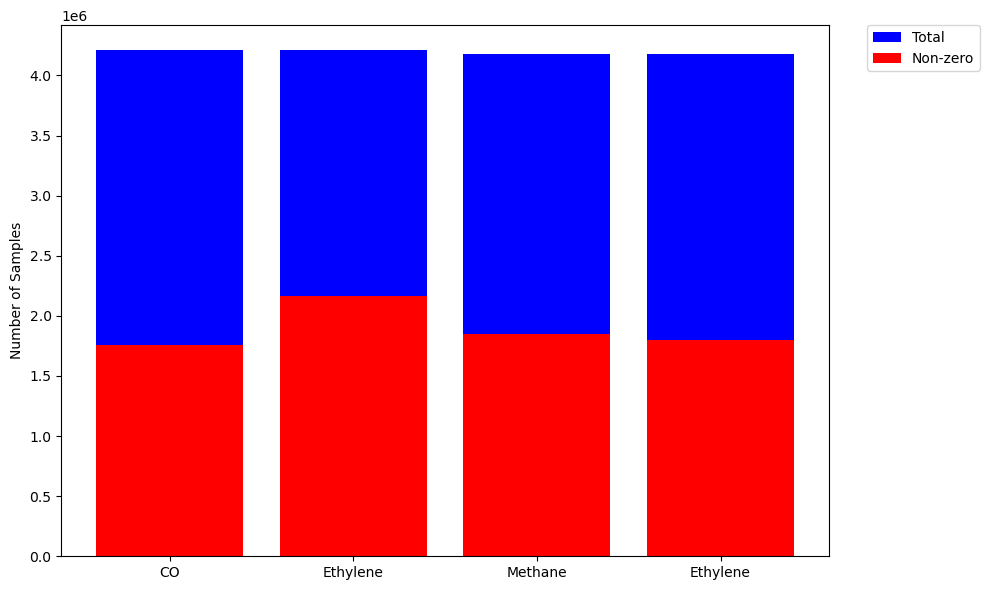

In [2]:
# 找到CO或者Ethylene浓度不为0的列
data1['label_CO'] = data1['CO con: (ppm)'].apply(lambda x: 0 if pd.isna(x) or x==0 else 1)
data1['label_Ethylene'] = data1['Ethylene con: (ppm'].apply(lambda x: 0 if pd.isna(x) or x==0 else 1)
data2['label_Methane'] = data2['Methane conc (ppm)'].apply(lambda x: 0 if pd.isna(x) or x==0 else 1)
data2['label_Ethylene'] = data2['Ethylene con: (ppm)'].apply(lambda x: 0 if pd.isna(x) or x==0 else 1)

y1 = [data1.shape[0], data1.shape[0], data2.shape[0], data2.shape[0]]
y2 = [data1['label_CO'].sum(), data1['label_Ethylene'].sum(), data2['label_Methane'].sum(), data2['label_Ethylene'].sum()]

plt.figure(figsize=(10, 6))
plt.bar(range(4), y1, color='b', label='Total')
plt.bar(range(4), y2, color='r', label='Non-zero')
plt.xticks(range(4), ['CO', 'Ethylene', 'Methane', 'Ethylene'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.show()

ehylene1: 966564, ethylene2: 848598


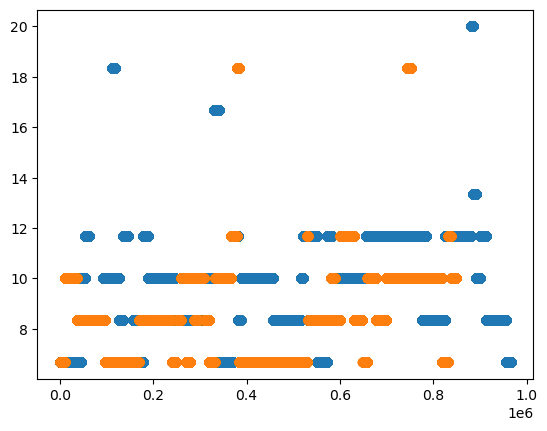

In [40]:
# 只取CO或者Ethylene浓度不为0的数据
new_data1 = data1[(data1['label_CO']==1) & (data1['label_Ethylene']==1)]
new_data2 = data2[(data2['label_Methane']==1) & (data2['label_Ethylene']==1)]

time1, CO, ethylene1 = new_data1.iloc[:, 1], new_data1.iloc[:, 2], new_data1.iloc[:, 3]
time2, methane, ethylene2 = new_data2.iloc[:, 1], new_data2.iloc[:, 2], new_data2.iloc[:, 3]

# 比较两个数据的时间长度
print(f'ehylene1: {ethylene1.shape[0]}, ethylene2: {ethylene2.shape[0]}') 
# 比较两个数据中的 ethylene 浓度
plt.scatter(range(ethylene1.shape[0]),ethylene1)
plt.scatter(range(ethylene2.shape[0]),ethylene2)
plt.show()

# 发现二者并非完全一致，所以上述绘图应该分开

C:\Users\Insomnia Dairy\AppData\Local\Temp\ipykernel_13680\3095301504.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


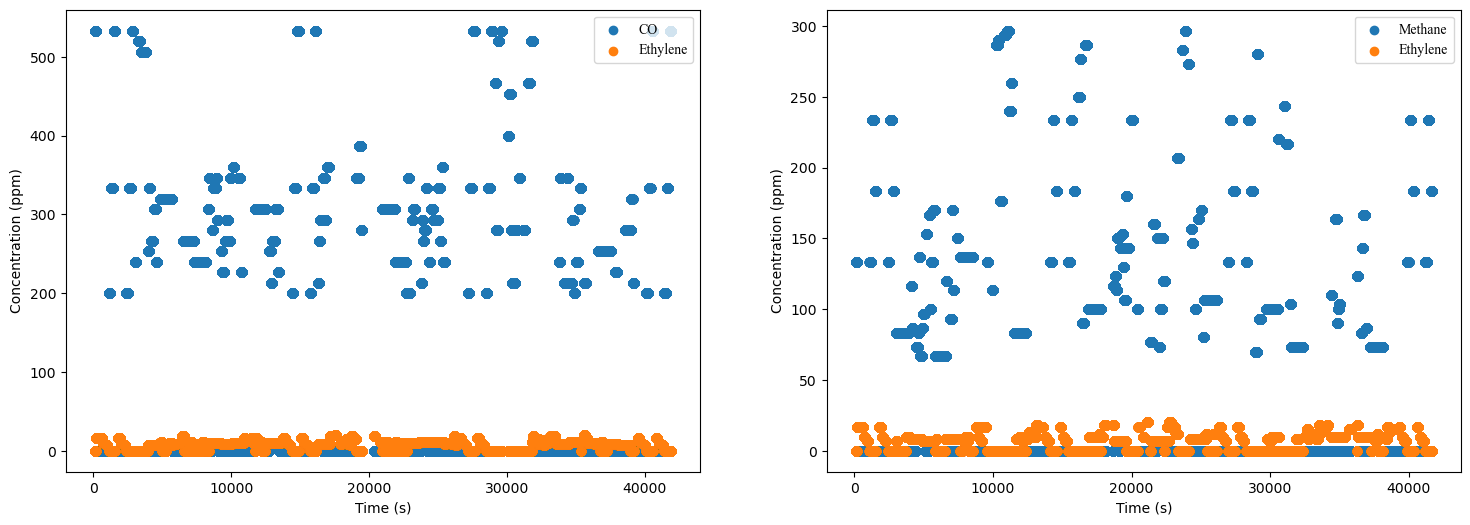

In [5]:
# 按照时间顺序绘制数据集中两种气体的浓度
fig, ax = plt.subplots(1,2,figsize=(18,6))  
# 设置字体为Times New Roman
plt.rcParams['font.family'] = ['Times New Roman']

ax[0].scatter(time1, CO, label='CO')
ax[0].scatter(time1, ethylene1, label='Ethylene')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Concentration (ppm)')
ax[0].legend(loc='upper right') # 将图例放在右上角

ax[1].scatter(time2, methane, label='Methane')
ax[1].scatter(time2, ethylene2, label='Ethylene')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Concentration (ppm)')
ax[1].legend(loc='upper right') # 将图例放在右上角

# 保存图像为高分辨率 600 ppi
fig.savefig('./fig1.png', dpi=600)
# 在保存后展示图像
fig.show()

C:\Users\Insomnia Dairy\AppData\Local\Temp\ipykernel_13680\341778993.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


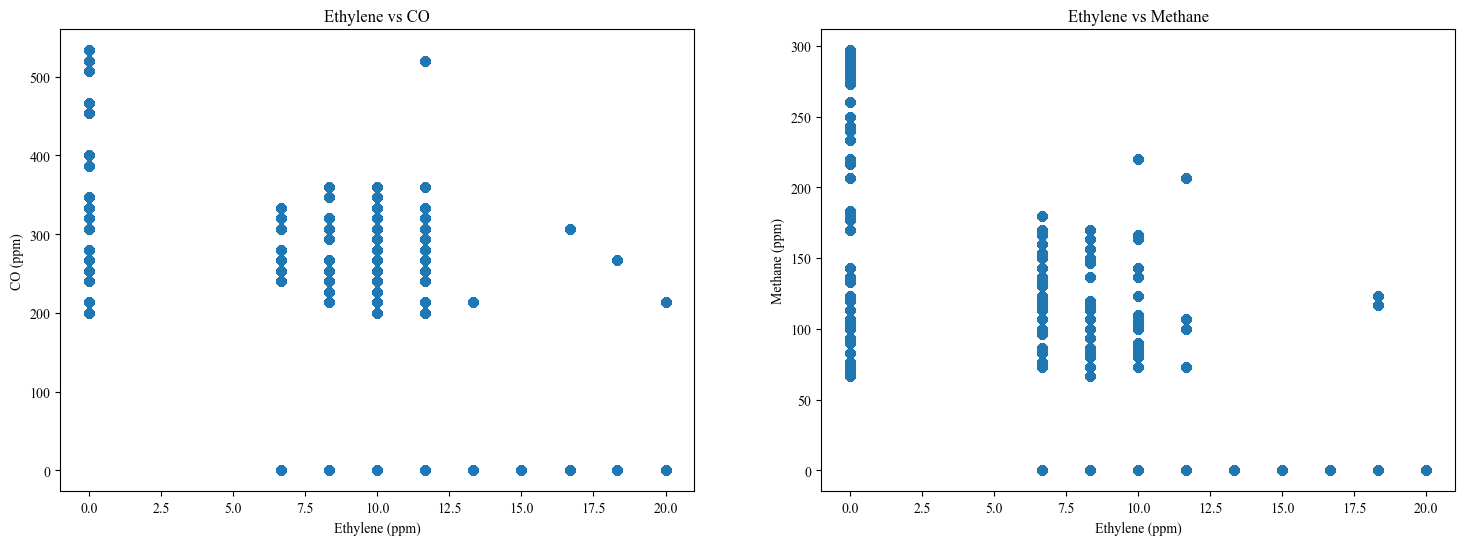

In [6]:
# 绘制变量之间的散点图
fig, ax = plt.subplots(1,2,figsize=(18,6))

ax[0].scatter(ethylene1, CO)
ax[0].set_xlabel('Ethylene (ppm)')
ax[0].set_ylabel('CO (ppm)')
ax[0].set_title('Ethylene vs CO')

ax[1].scatter(ethylene2, methane)
ax[1].set_xlabel('Ethylene (ppm)')
ax[1].set_ylabel('Methane (ppm)')
ax[1].set_title('Ethylene vs Methane')

# 保存图像为高分辨率 600 ppi
fig.savefig('./fig2.png', dpi=600)
# 在保存后展示图像
fig.show()

C:\Users\Insomnia Dairy\AppData\Local\Temp\ipykernel_11140\3998975899.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = gas_data.groupby('Concentration Bin').mean()
C:\Users\Insomnia Dairy\AppData\Local\Temp\ipykernel_11140\3998975899.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = gas_data.groupby('Concentration Bin').mean()
C:\Users\Insomnia Dairy\AppData\Local\Temp\ipykernel_11140\3998975899.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observe

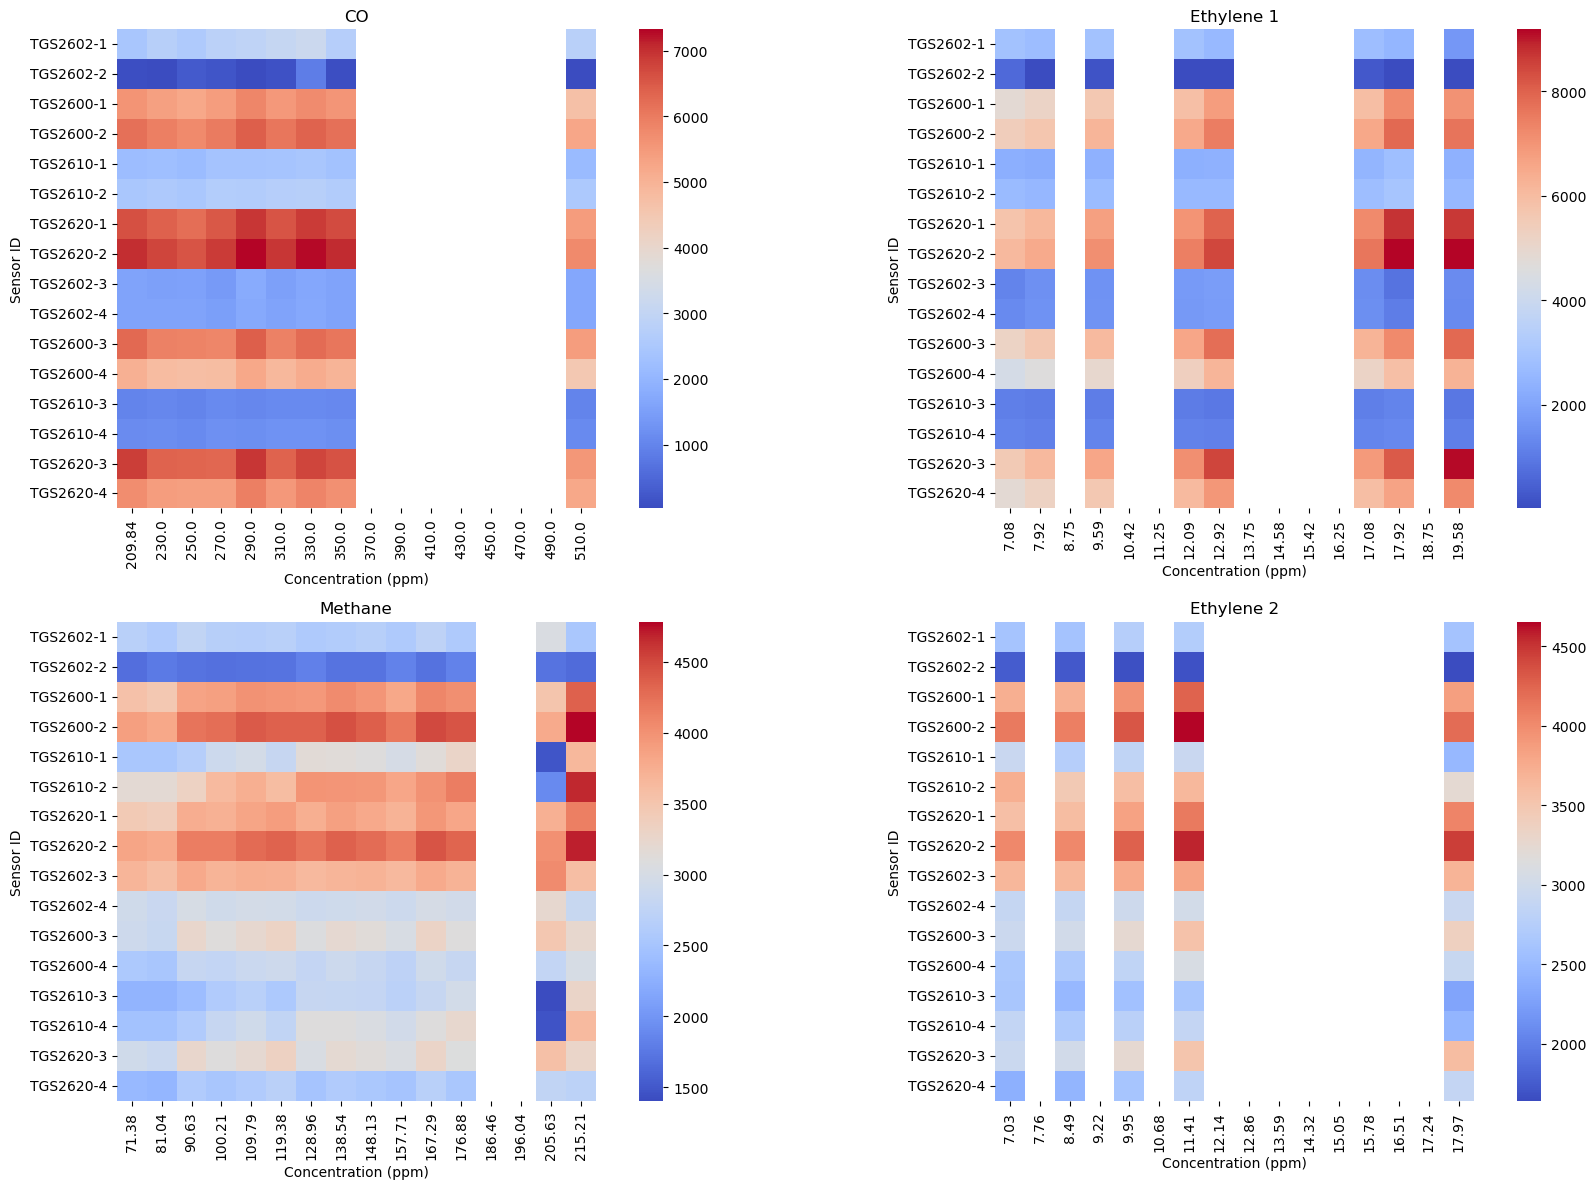

In [43]:
import seaborn as sns

single_gas_data = [[CO, ethylene1], [methane, ethylene2]]
single_gas_name = [['CO', 'Ethylene 1'], ['Methane', 'Ethylene 2']]

# 读取16个传感器的值
sensors_data = [new_data1.iloc[:, 4:20], new_data2.iloc[:, 4:20]]

fig, ax = plt.subplots(2,2,figsize=(18,12))
for i in range(2):
    sensors = sensors_data[i]
    for j in range(2):
        single_gas = single_gas_data[i][j]
        # 组成新的数据集
        gas_data = pd.concat([single_gas, sensors], axis=1)
        gas_data = gas_data.sort_values(by=gas_data.columns[0])  # 按照气体浓度排序
        # 使用pd.qcut将浓度划分为16个等频率的区间
        gas_data['Concentration Bin'] = pd.cut(gas_data[gas_data.columns[0]], 16, duplicates='drop')
        # 按照浓度区间分组，计算每个区间内的传感器值的均值  
        binned_data = gas_data.groupby('Concentration Bin').mean()
        # 将分箱区间的左端点作为横坐标，以确保有16个刻度
        binned_data.index = binned_data.index.map(lambda x: round(x.mid, 2))  # 使用左端点作为刻度
        # 去除气体浓度列
        binned_data = binned_data.drop(columns=[gas_data.columns[0]], errors='ignore')
        # 转置数据框，使传感器作为纵轴
        binned_data = binned_data.transpose()
        # 绘制热力图
        sns.heatmap(binned_data, ax=ax[i, j], cmap='coolwarm', square=True)  # 使用square=True确保正方形
        ax[i, j].set_title(f'{single_gas_name[i][j]}')  # 修正为使用正确的索引
        ax[i, j].set_xlabel('Concentration (ppm)')
        ax[i, j].set_ylabel('Sensor ID')
        # 设置横坐标标签为水平
        ax[i, j].tick_params(axis='x', rotation=90)
# 调整图形布局，防止重叠
plt.tight_layout()
plt.show()

C:\Users\Insomnia Dairy\AppData\Local\Temp\ipykernel_11140\3969456636.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = tmp_data1.groupby('Concentration Bin').mean()


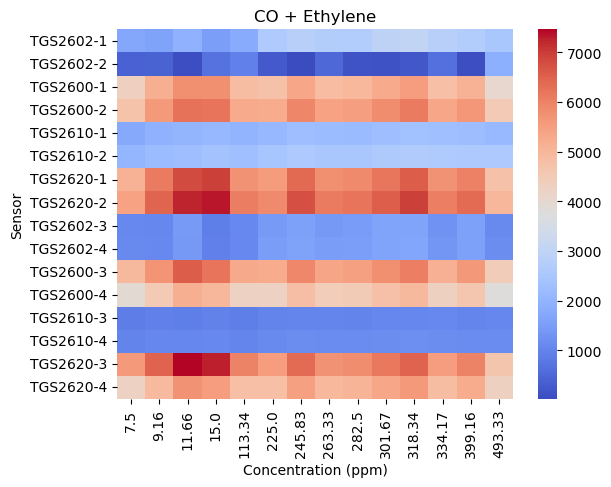

In [28]:
import seaborn as sns

# 计算混合浓度，并为其命名
mixed_concentration1 = ethylene1 + CO
mixed_concentration1.name = 'Concentration (ppm)'

# 读取16个传感器的值
sensors_data = new_data1.iloc[:, 4:20]

# 组成一个新的数据集，将浓度数据作为新的列添加到传感器数据中
tmp_data1 = pd.concat([mixed_concentration1, sensors_data], axis=1)
# 对数据集按混合浓度进行排序
tmp_data1 = tmp_data1.sort_values(by=mixed_concentration1.name)

# 使用pd.qcut将浓度划分为16个等频率的区间，确保每个区间的样本数量更均匀
tmp_data1['Concentration Bin'] = pd.qcut(tmp_data1['Concentration (ppm)'], q=16, duplicates='drop')

# 按照浓度区间分组，并计算各传感器值的平均值
binned_data = tmp_data1.groupby('Concentration Bin').mean()

# 将分箱后的区间中位数作为横坐标
binned_data.index = binned_data.index.map(lambda x: round(x.mid, 2))

# 去除任何不必要的标签
binned_data = binned_data.drop(columns=['Concentration (ppm)'], errors='ignore')

# 转置数据框，使传感器作为纵轴
heatmap_data = binned_data.transpose()

# 绘制热力图
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('CO + Ethylene')
plt.xlabel('Concentration (ppm)')
plt.ylabel('Sensor')
plt.show()

造成以上原因：
- 单一气体浓度分布不均
- 混合气体浓度分布更均匀